## Dataset Regresión Lineal

### Pasos de la actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [567]:
#cargar las librerias necesarias
import pandas as pd #maneja y analisa estructura de datos.
import numpy as np # calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt # crea graficos en 2 dimensiones

# librerias para implementar modelo de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [514]:
# Lectura de datos y se cargan en la variable datos
Dataset = pd.read_csv('./Car_details_v3.csv')

In [515]:
# se realiza la lectura de los datos para el analisis exploratorio
Dataset.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [516]:
#Describir los datos
Dataset.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


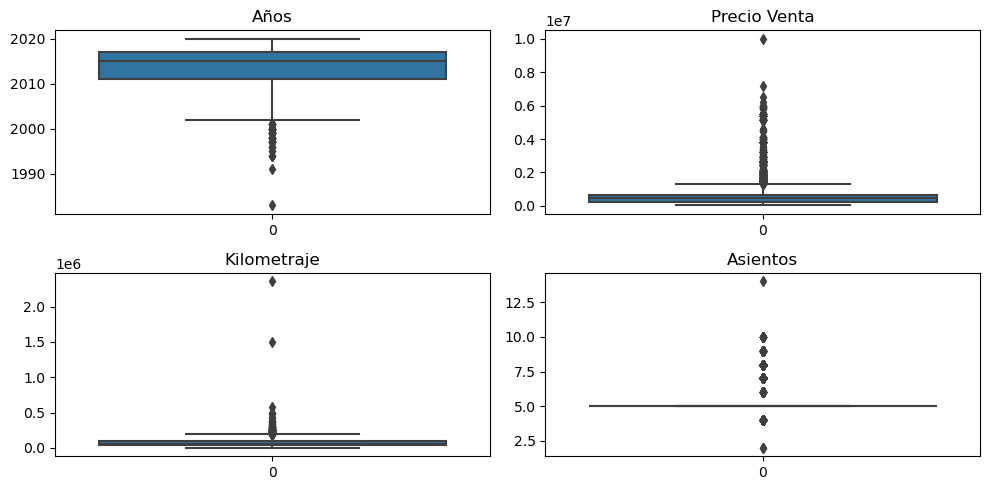

In [517]:
# Identificacion de valores faltantes y atipicos
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Dataset['year'], ax = axs[0,0]).set_title("Años")
plt2 = sns.boxplot(Dataset['selling_price'], ax = axs[0,1]).set_title("Precio Venta")
plt3 = sns.boxplot(Dataset['km_driven'], ax = axs[1,0]).set_title("Kilometraje")
plt1 = sns.boxplot(Dataset['seats'], ax = axs[1,1]).set_title("Asientos")

plt.tight_layout()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

### Datos faltantes

In [518]:
#Revision de datos faltantes

#Registros numéricos
print("Cantidad de registros con 0 en años de vehículo es de: ", (Dataset['year'].isin([0]).sum() + + Dataset['year'].isna().sum()))
print("Cantidad de registros con 0 en precios de venta es de: ", (Dataset['selling_price'].isin([0]).sum() + + Dataset['selling_price'].isna().sum()))
print("Cantidad de registros con 0 en kilometrajes es de: ", (Dataset['km_driven'].isin([0]).sum() + + Dataset['km_driven'].isna().sum()))
print("Cantidad de registros con 0 en asientos es de: ", (Dataset['seats'].isin([0]).sum() + Dataset['seats'].isna().sum()))

#Registros textuales
print("Cantidad de registros nulos en nombre es de: ", (Dataset['name'].isin([0]).sum() + + Dataset['name'].isna().sum()))
print("Cantidad de registros nulos en gasolina es de: ", (Dataset['fuel'].isin([0]).sum() + + Dataset['fuel'].isna().sum()))
print("Cantidad de registros nulos en vendedor es de: ", (Dataset['seller_type'].isin([0]).sum() + + Dataset['seller_type'].isna().sum()))
print("Cantidad de registros nulos en trasmision es de: ", (Dataset['transmission'].isin([0]).sum() + Dataset['transmission'].isna().sum()))
print("Cantidad de registros nulos en propietario es de: ", (Dataset['owner'].isin([0]).sum() + Dataset['owner'].isna().sum()))
print("Cantidad de registros nulos en millaje es de: ", (Dataset['mileage'].isin([0]).sum() + Dataset['mileage'].isna().sum()))
print("Cantidad de registros nulos en motor es de: ", (Dataset['engine'].isin([0]).sum() + Dataset['engine'].isna().sum()))
print("Cantidad de registros nulos en potencia maxima es de: ", (Dataset['max_power'].isin([0]).sum() + Dataset['max_power'].isna().sum()))
print("Cantidad de registros nulos en torques es de: ", (Dataset['torque'].isin([0]).sum() + Dataset['torque'].isna().sum()))

Cantidad de registros con 0 en años de vehículo es de:  0
Cantidad de registros con 0 en precios de venta es de:  0
Cantidad de registros con 0 en kilometrajes es de:  0
Cantidad de registros con 0 en asientos es de:  221
Cantidad de registros nulos en nombre es de:  0
Cantidad de registros nulos en gasolina es de:  0
Cantidad de registros nulos en vendedor es de:  0
Cantidad de registros nulos en trasmision es de:  0
Cantidad de registros nulos en propietario es de:  0
Cantidad de registros nulos en millaje es de:  221
Cantidad de registros nulos en motor es de:  221
Cantidad de registros nulos en potencia maxima es de:  215
Cantidad de registros nulos en torques es de:  222


In [519]:
# Reemplazar los ceros o vacíos con el valor medio o la moda de la columna

#Asientos
Dataset['seats'] = Dataset['seats'].mask(Dataset['seats']=='nan', None).ffill()

#Millaje - Reemplazamos valor vacío con el valor de la casilla anterior
Dataset['mileage'] = Dataset['mileage'].mask(Dataset['mileage']=='nan', None).ffill()

#Motor - Reemplazamos valor vacío con el valor de la casilla anterior
Dataset['engine'] = Dataset['engine'].mask(Dataset['engine']=='nan', None).ffill()

#Potencia - Reemplazamos valor vacío con el valor de la casilla anterior
Dataset['max_power'] = Dataset['max_power'].mask(Dataset['max_power']=='nan', None).ffill()

#Torque - Reemplazamos valor vacío con el valor de la casilla anterior
Dataset['torque'] = Dataset['torque'].mask(Dataset['torque']=='nan', None).ffill()

In [520]:
#Se vuelven a verificar los datos faltantes

#Registros numéricos
print("Cantidad de registros con 0 en asientos es de: ", (Dataset['seats'].isin([0]).sum() + Dataset['seats'].isna().sum()))

#Registros textuales
print("Cantidad de registros nulos en millaje es de: ", (Dataset['mileage'].isin([0]).sum() + Dataset['mileage'].isna().sum()))
print("Cantidad de registros nulos en motor es de: ", (Dataset['engine'].isin([0]).sum() + Dataset['engine'].isna().sum()))
print("Cantidad de registros nulos en potencia maxima es de: ", (Dataset['max_power'].isin([0]).sum() + Dataset['max_power'].isna().sum()))
print("Cantidad de registros nulos en torques es de: ", (Dataset['torque'].isin([0]).sum() + Dataset['torque'].isna().sum()))

Cantidad de registros con 0 en asientos es de:  0
Cantidad de registros nulos en millaje es de:  0
Cantidad de registros nulos en motor es de:  0
Cantidad de registros nulos en potencia maxima es de:  0
Cantidad de registros nulos en torques es de:  0


### Datos Atípicos

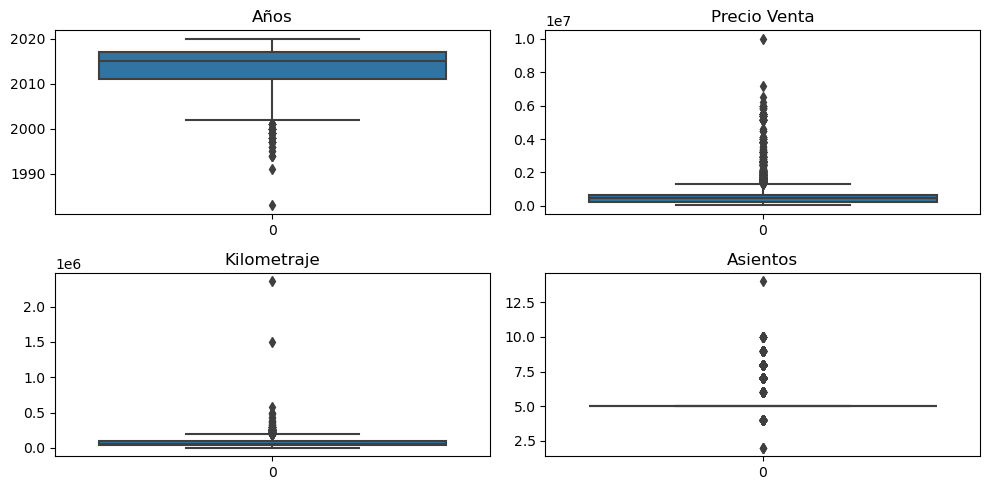

In [521]:
# Identificación de datos atípicos

fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Dataset['year'], ax = axs[0,0]).set_title("Años")
plt2 = sns.boxplot(Dataset['selling_price'], ax = axs[0,1]).set_title("Precio Venta")
plt3 = sns.boxplot(Dataset['km_driven'], ax = axs[1,0]).set_title("Kilometraje")
plt1 = sns.boxplot(Dataset['seats'], ax = axs[1,1]).set_title("Asientos")

plt.tight_layout()

In [522]:
# Conteo de datos atipicos

#Años
years_nivel_minimo = 1980
years_nivel_maximo = 2023
years_Total_Atipicos = ((Dataset['year']<years_nivel_minimo) | (Dataset['year']>years_nivel_maximo)).sum()
print("El total de los años atipicos es: {}".format(years_Total_Atipicos))

#Precio de venta
price_nivel_minimo = 30000
price_nivel_maximo = 5000000
price_Total_Atipicos = ((Dataset['selling_price']<price_nivel_minimo) | (Dataset['selling_price']>price_nivel_maximo)).sum()
print("El total de los precios atipicos es: {}".format(price_Total_Atipicos))

#Kilometraje
kms_nivel_minimo = 1
kms_nivel_maximo = 150000
kms_Total_Atipicos = ((Dataset['km_driven']<kms_nivel_minimo) | (Dataset['km_driven']>kms_nivel_maximo)).sum()
print("El total de los kilometrajes atipicos es: {}".format(kms_Total_Atipicos))

#Asientos
seats_nivel_minimo = 5
seats_nivel_maximo = 7
seats_Total_Atipicos = ((Dataset['seats']<seats_nivel_minimo) | (Dataset['seats']>seats_nivel_maximo)).sum()
print("El total de los asientos atipicos es: {}".format(seats_Total_Atipicos))
print("total asientos: {}".format(Dataset['seats'].count()))

El total de los años atipicos es: 0
El total de los precios atipicos es: 118
El total de los kilometrajes atipicos es: 392
El total de los asientos atipicos es: 487
total asientos: 8128


In [523]:
# Se filtran datos atipicos

#Años
Dataset=Dataset[(Dataset['year']<years_nivel_maximo)&(Dataset['year']>years_nivel_minimo)]

#Precios
Dataset=Dataset[(Dataset['selling_price']<price_nivel_maximo)&(Dataset['selling_price']>price_nivel_minimo)]

#Kilometraje
Dataset=Dataset[(Dataset['km_driven']<kms_nivel_maximo)&(Dataset['km_driven']>kms_nivel_minimo)]

#Asientos
Dataset=Dataset[(Dataset['seats']<=seats_nivel_maximo)&(Dataset['seats']>=seats_nivel_minimo)]

In [524]:
# Se valida si se removieron los datos atipicos

#Años
years_Total_Atipicos = ((Dataset['year']<years_nivel_minimo) | (Dataset['year']>years_nivel_maximo)).sum()
print("El total de los años atipicos es: {}".format(years_Total_Atipicos))

#Precio de venta
price_Total_Atipicos = ((Dataset['selling_price']<price_nivel_minimo) | (Dataset['selling_price']>price_nivel_maximo)).sum()
print("El total de los precios atipicos es: {}".format(price_Total_Atipicos))

#Kilometraje
kms_Total_Atipicos = ((Dataset['km_driven']<kms_nivel_minimo) | (Dataset['km_driven']>kms_nivel_maximo)).sum()
print("El total de los kilometrajes atipicos es: {}".format(kms_Total_Atipicos))

#Asientos
seats_Total_Atipicos = ((Dataset['seats']<seats_nivel_minimo) | (Dataset['seats']>seats_nivel_maximo)).sum()
print("El total de los asientos atipicos es: {}".format(seats_Total_Atipicos))

El total de los años atipicos es: 0
El total de los precios atipicos es: 0
El total de los kilometrajes atipicos es: 0
El total de los asientos atipicos es: 0


### Limpieza de dígitos en Millaje, Potencia y Asientos para su utilización

In [525]:
#Limpiamos valores utiles para manejarlos

#Millaje - Sacamos dígitos del string y los volvemos un entero
Dataset['mileage'] = (Dataset['mileage'].astype("string")).str.extract('(\d+)').astype('int64')

#Potencia - Sacamos dígitos del string y los volvemos un entero
Dataset['max_power'] = (Dataset['max_power'].astype("string")).str.extract('(\d+)').astype('int64')

#Asientos - Los convertimos en enteros
Dataset['seats'] = Dataset['seats'].astype('int64')

In [526]:
#revision de tipo de datos y datos faltantes

Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7158 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           7158 non-null   object
 1   year           7158 non-null   int64 
 2   selling_price  7158 non-null   int64 
 3   km_driven      7158 non-null   int64 
 4   fuel           7158 non-null   object
 5   seller_type    7158 non-null   object
 6   transmission   7158 non-null   object
 7   owner          7158 non-null   object
 8   mileage        7158 non-null   int64 
 9   engine         7158 non-null   object
 10  max_power      7158 non-null   int64 
 11  torque         7158 non-null   object
 12  seats          7158 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 782.9+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:
- Columna "Selling_Prices" pues nos ayudará a predecir el precio del vehículo.

In [527]:
# Vista de los distintos precios

Dataset['selling_price'].value_counts()

selling_price
300000     209
350000     189
600000     186
550000     177
450000     175
          ... 
698000       1
539000       1
571000       1
4090000      1
746000       1
Name: count, Length: 620, dtype: int64

In [528]:
Dataset[['selling_price']].head(20)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
8,350000
10,500000
11,92000
12,280000


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [529]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%
# Se crean variables X y Y para almacenar la información del entrenamiento

# Se cargan los datos de train sin los datos de la columna selling_price ni los datos que contengan texto
X = Dataset.drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner',
                 'engine', 'torque'],axis=1)
Y = Dataset['selling_price'] # Se cargan los datos de train con  los datos de la la columna selling_price

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [530]:
print (X_train)

      year  km_driven  mileage  max_power  seats
2673  2019       5621       22         81      5
3367  2016      38000       18         81      5
7445  2017      34000       21         55      5
4649  2018      40000       19         85      5
70    2017      80000       21        108      5
...    ...        ...      ...        ...    ...
1414  2009      60000       18         67      5
643   2011      40000       18         67      5
6993  2015     100000       18         82      5
3736  2014     120000       23         67      5
2545  2012      85000       21         87      5

[5368 rows x 5 columns]


In [531]:
print (Y_train)

2673    650000
3367    540000
7445    254999
4649    600000
70      500000
         ...  
1414    114999
643     270000
6993    350000
3736    420000
2545    600000
Name: selling_price, Length: 5368, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparametros

In [554]:
# Construir el modelo de regresión lineal 

modelo_regresion = LinearRegression() # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit(X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [544]:
print (modelo_regresion.coef_)

[ 3.95612080e+04 -2.08288279e+00  5.94990041e+03  1.26831415e+04
 -1.53999427e+04]


In [569]:
#Generamos tabla con los coeficientes de predicción del modelo

pd.DataFrame(modelo_regresion.coef_, X.columns, columns = ['Coedicients']) #Cada coeficiente indica un incremento en la variable final, el precio

,Coedicients
year,39561.207998
km_driven,-2.082883
mileage,5949.900407
max_power,12683.141462
seats,-15399.942702


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [568]:
# Coeficiente de determinación "r2 score"

print(r2_score(Y_test,Prediccion))

0.6398675593275771


In [571]:
# Error absoluto medio

MAE= metrics.mean_absolute_error(Y_test, Prediccion)
print(MAE)

214333.42777034568


In [573]:
# Error cuadrático medio

MSE=metrics.mean_squared_error(Y_test, Prediccion)
print(MSE)

107834907154.59183


In [574]:
# Distancia media cuadrática mínima 

RMSE= np.sqrt(MSE)
print(RMSE)

328382.25767326687


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

Text(0, 0.5, 'Prediccion')

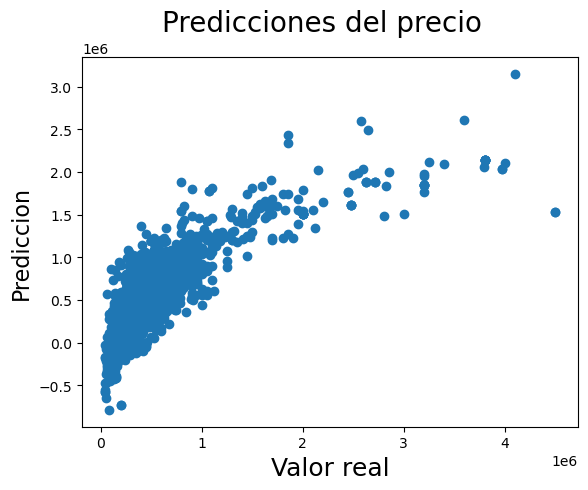

In [562]:
# Gráfico de dispersión

fig = plt.figure()
plt.scatter(Y_test, Prediccion)
fig.suptitle('Predicciones del precio', fontsize=20)           # título 
plt.xlabel('Valor real', fontsize=18)                          # Valores realides de Y_Test
plt.ylabel('Prediccion', fontsize=16)                          # Valores predecidos

Text(0.5, 0, 'Prediccion')

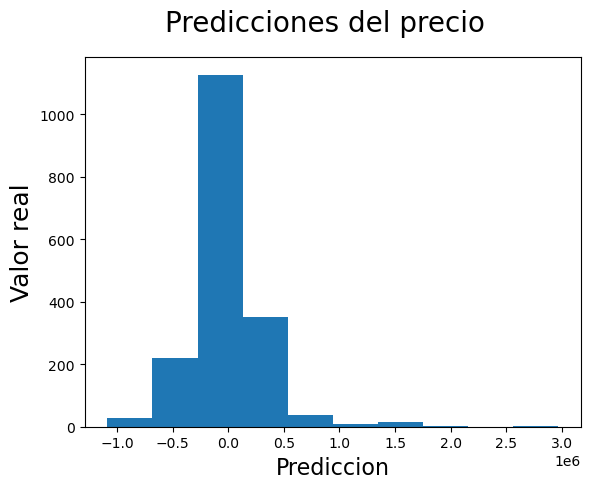

In [564]:
#Diagrama de barras

fig = plt.figure()
plt.hist(Y_test - Prediccion)
fig.suptitle('Predicciones del precio', fontsize=20)           # título 
plt.ylabel('Valor real', fontsize=18)                          # Valores realides de Y_Test
plt.xlabel('Prediccion', fontsize=16)                          # Valores predecidos

## 8. Interpretar, analizar y documentar los resultados obtenidos.